$$UNIVERSIDAD\hspace{1mm} AUTÓNOMA\hspace{1mm} DE\hspace{1mm} NUEVO\hspace{1mm} LEÓN $$$$Facultad\hspace{1mm}  de\hspace {1mm}Ciencias\hspace{1mm} Físico-Matemáticas $$$$Minería\hspace{1mm}de\hspace{1mm}Datos$$$$\hspace{1mm}$$

## PRÁCTICA 2   _Visualización de los datos_

**GLORIA NOHEMI MARTINEZ JIMENEZ 1805800**

**MIGUEL ALEJANDRO NORIEGA ORTEGA 1798528**

**TANIA SARAHI ROSSEL CASTILLO 1810461**

In [146]:
import pandas as pd

In [147]:
import matplotlib as plt
%matplotlib inline
daf = pd.read_csv("2016.csv", index_col=0)
daf.head(3)

,Region,Happiness Rank,Happiness Score,Lower Confidence Interval,Upper Confidence Interval,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
Country,,,,,,,,,,,,
Denmark,Western Europe,1,7.526,7.460,7.592,1.44178,1.16374,0.79504,0.57941,0.44453,0.36171,2.73939
Switzerland,Western Europe,2,7.509,7.428,7.590,1.52733,1.14524,0.86303,0.58557,0.41203,0.28083,2.69463
Iceland,Western Europe,3,7.501,7.333,7.669,1.42666,1.18326,0.86733,0.56624,0.14975,0.47678,2.83137


Hacemos el mismo codigo para limpieza de los datos para trabajar de manera mas eficiente

In [148]:
daf['Happiness score ajustado']= daf['Happiness Score']-daf['Dystopia Residual']
daf.drop(['Upper Confidence Interval','Happiness Rank','Lower Confidence Interval','Dystopia Residual'],axis = 1, inplace= True)

In [149]:
daf.rename(columns = {'Happiness Score':'Happiness_Score'}, inplace= True)
daf.rename(columns={'Economy (GDP per Capita)':'Economy'},inplace=True)
daf.rename(columns= {'Health (Life Expectancy)':'Health'},inplace=True)
daf.rename(columns={'Trust (Government Corruption)':'Trust'}, inplace=True)
daf.rename(columns={'Happiness score ajustado':'Happiness_score_ajustado'}, inplace=True)
daf.head()

,Region,Happiness_Score,Economy,Family,Health,Freedom,Trust,Generosity,Happiness_score_ajustado
Country,,,,,,,,,
Denmark,Western Europe,7.526,1.44178,1.16374,0.79504,0.57941,0.44453,0.36171,4.78661
Switzerland,Western Europe,7.509,1.52733,1.14524,0.86303,0.58557,0.41203,0.28083,4.81437
Iceland,Western Europe,7.501,1.42666,1.18326,0.86733,0.56624,0.14975,0.47678,4.66963
Norway,Western Europe,7.498,1.57744,1.12690,0.79579,0.59609,0.35776,0.37895,4.83335
Finland,Western Europe,7.413,1.40598,1.13464,0.81091,0.57104,0.41004,0.25492,4.58704


In [150]:
daf['Economia']= daf['Economy']/daf['Happiness_score_ajustado']
daf['Familia']= daf['Family']/daf['Happiness_score_ajustado']
daf['Salud']= daf['Health']/daf['Happiness_score_ajustado']
daf['Libertad']= daf['Freedom']/daf['Happiness_score_ajustado']
daf['Transparencia']= daf['Trust']/daf['Happiness_score_ajustado']
daf['Generosidad']= daf['Generosity']/daf['Happiness_score_ajustado']

In [151]:
daf.drop(['Economy','Family','Health','Freedom','Trust','Generosity'],axis = 1, inplace= True)

In [152]:
daf.head()

,Region,Happiness_Score,Happiness_score_ajustado,Economia,Familia,Salud,Libertad,Transparencia,Generosidad
Country,,,,,,,,,
Denmark,Western Europe,7.526,4.78661,0.301211,0.243124,0.166097,0.121048,0.092869,0.075567
Switzerland,Western Europe,7.509,4.81437,0.317244,0.237880,0.179261,0.121630,0.085583,0.058332
Iceland,Western Europe,7.501,4.66963,0.305519,0.253395,0.185738,0.121260,0.032069,0.102102
Norway,Western Europe,7.498,4.83335,0.326366,0.233151,0.164646,0.123329,0.074019,0.078403
Finland,Western Europe,7.413,4.58704,0.306511,0.247358,0.176783,0.124490,0.089391,0.055574


Analizamos los que tipos de datos contienen nuestras columnas

In [153]:
daf.dtypes

Region                       object
Happiness_Score             float64
Happiness_score_ajustado    float64
Economia                    float64
Familia                     float64
Salud                       float64
Libertad                    float64
Transparencia               float64
Generosidad                 float64
dtype: object

Seguimos con una descripcion estadistica basica.

Primeramente analizamos el promedio del happiness score ajustado

In [154]:
daf["Happiness_score_ajustado"].mean()

3.0563781528662406

Por lo que nos dice que la media de la puntación ronda entre los 3.05 puntos.

Asi mismo verificamos maximos y minimos junto con los cuartiles para analizarlo de una manera mas completa. 

In [155]:
daf['Happiness_score_ajustado'].describe()

count    157.000000
mean       3.056378
std        0.961370
min        0.800960
25%        2.360870
50%        3.074130
75%        3.654060
max        4.858470
Name: Happiness_score_ajustado, dtype: float64

Lo mismo podriamos checar con el analisis desarrollado del factor de economia de todos los paises para saber sus maximos, minimos y cuantiles. 

In [156]:
daf['Economia'].describe()

count    157.000000
mean       0.300803
std        0.083478
min        0.000000
25%        0.273336
50%        0.321362
75%        0.356588
max        0.478325
Name: Economia, dtype: float64

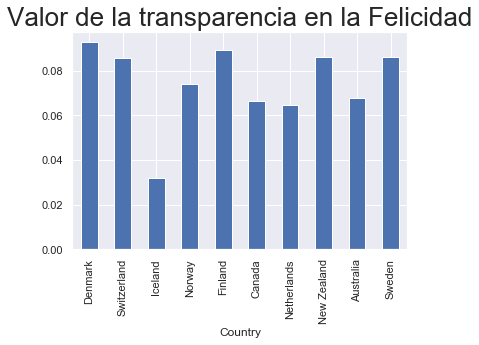

In [157]:
import matplotlib.pyplot as plt
import seaborn as sns
daf['Transparencia'].head(10).plot.bar()
plt.title('Valor de la transparencia en la Felicidad',size=26)
sns.set(rc={'figure.figsize':(10,5)})

En esta grafica podemos ver a los 10 paises mas felices segun la base de datos y el que tanto les influye la transparencia de su gobierno en la felicidad

Text(0.5, 1.0, 'Peso de la economia en la felicidad ')

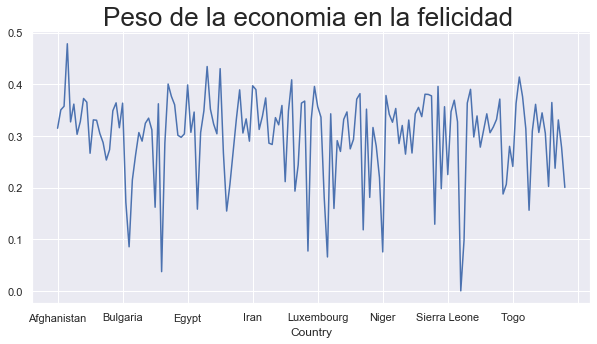

In [158]:
sns.set(rc={'figure.figsize':(10,5)})
daf['Economia'].sort_index().plot.line()
plt.title('Peso de la economia en la felicidad ',size=26)

Aqui podemos ver el peso que tiene la economia en la felicidad de los distintos paises del mundo , por lo general vemos que se encuentra entre un 20% un 40%

Text(0.5, 1.0, 'Peso de la familia en la felicidad ')

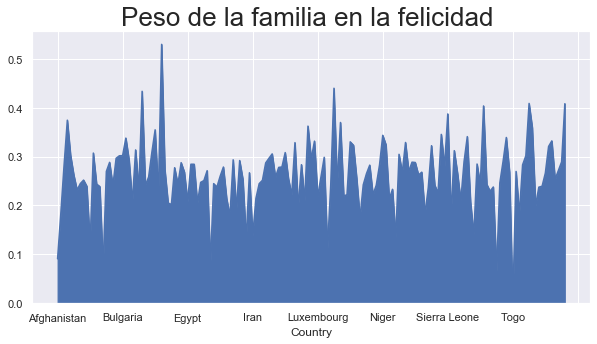

In [159]:
sns.set(rc={'figure.figsize':(10,5)})
daf['Familia'].sort_index().plot.area()
plt.title('Peso de la familia en la felicidad ',size=26)

En esta grafica se analiza el peso que tiene la familia en la felicidad en los paises, se observa que en su mayoria se tendria entre un 15% y un 30% 

Text(0.5, 1.0, 'Distribucion de las calificaciones de felicidad ')

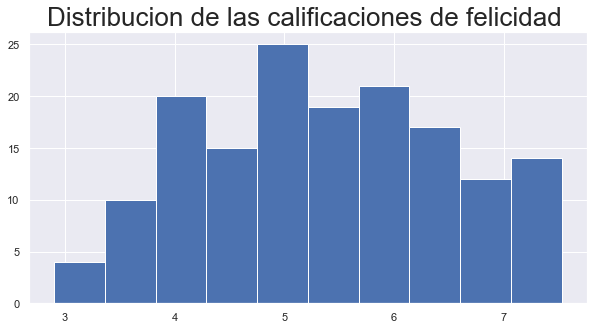

In [160]:
plt.hist(x=daf["Happiness_Score"])
plt.title('Distribucion de las calificaciones de felicidad ',size=26)

Aqui podemos visualizar la distribucion de las calificaciones de felicidad en los paises, siendo un 5 de 10 la calificacion mas comun con 25 apariciones en la base de datos 

Text(0.5, 1, 'Distribución Happiness Score Adj vs Familia')

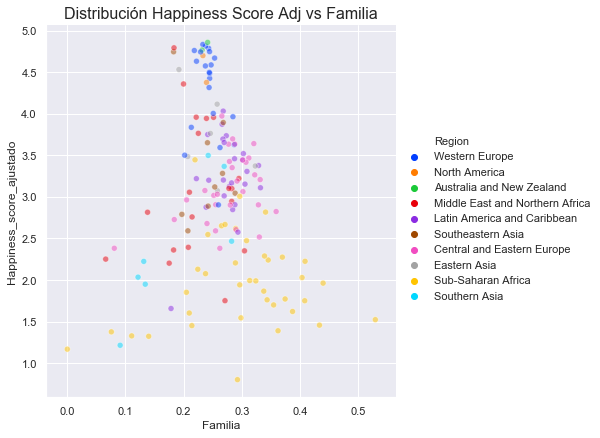

In [161]:
sns.relplot(x="Familia", y="Happiness_score_ajustado", hue="Region", alpha=.5, palette="bright",height=6, data=daf)
plt.title('Distribución Happiness Score Adj vs Familia',size=16)

Con esta visualizacion notamos los distintos puntajes que los paises le dan a la familia y el que tan felizes son de acuerdo al HAPPINESS SCORE AJUSTADO, esto diferenciado tambien por a que region pertenecen 

Text(0.5, 1.0, 'Relacion de la salud con la felicidad')

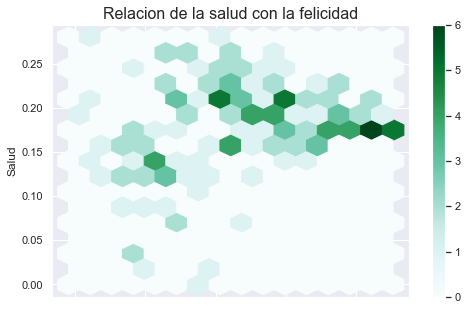

In [162]:
sns.set(rc={'figure.figsize':(8,5)})
daf.plot.hexbin(x='Happiness_Score', y='Salud', gridsize=15)
plt.title('Relacion de la salud con la felicidad',size=16)

En este caso la grafica nos muestra la relacion de la salud con la felicidad, entre mas arriba se encuentre la figura mas importancia le dan a la salud y entre mas a la izquierda mas felices son , por ultimo entre mas oscuro sea el color mas paises forman parte de la figura 

Text(0.5, 1.0, 'Paises por Region ')

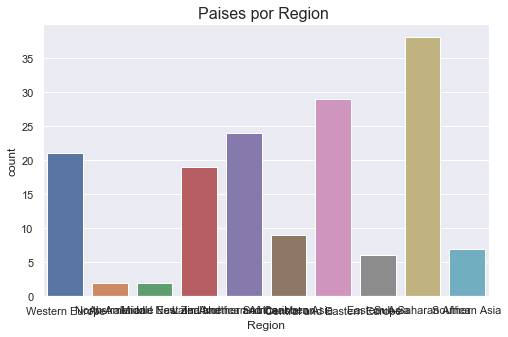

In [163]:
sns.countplot(daf['Region'])
sns.set(rc={'figure.figsize':(35,5)})
plt.title('Paises por Region ',size=16)

En la grafica se detalla cuantos paises forman parte de cada region en la base de datos , se puede ver que la region con mas paises en la base de datos es la de africa subsahariana

Text(0.5, 1, 'Peso de la generosidad en la felicidad ')

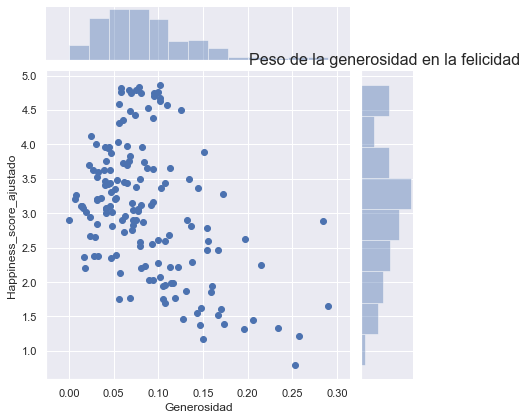

In [164]:
sns.jointplot(x='Generosidad', y='Happiness_score_ajustado', data=daf)
plt.title('Peso de la generosidad en la felicidad ',size=16)

En este caso la visualizacion no detalla el peso de la felicidad en los distintos paises y su nivel de felicicdad ajustado , podemos notar que los paises mas felices tienen un valor en generosidad entre el 5% y el 10%

Text(0.5, 1.0, 'Boxplot Happiness Score Adj por región ')

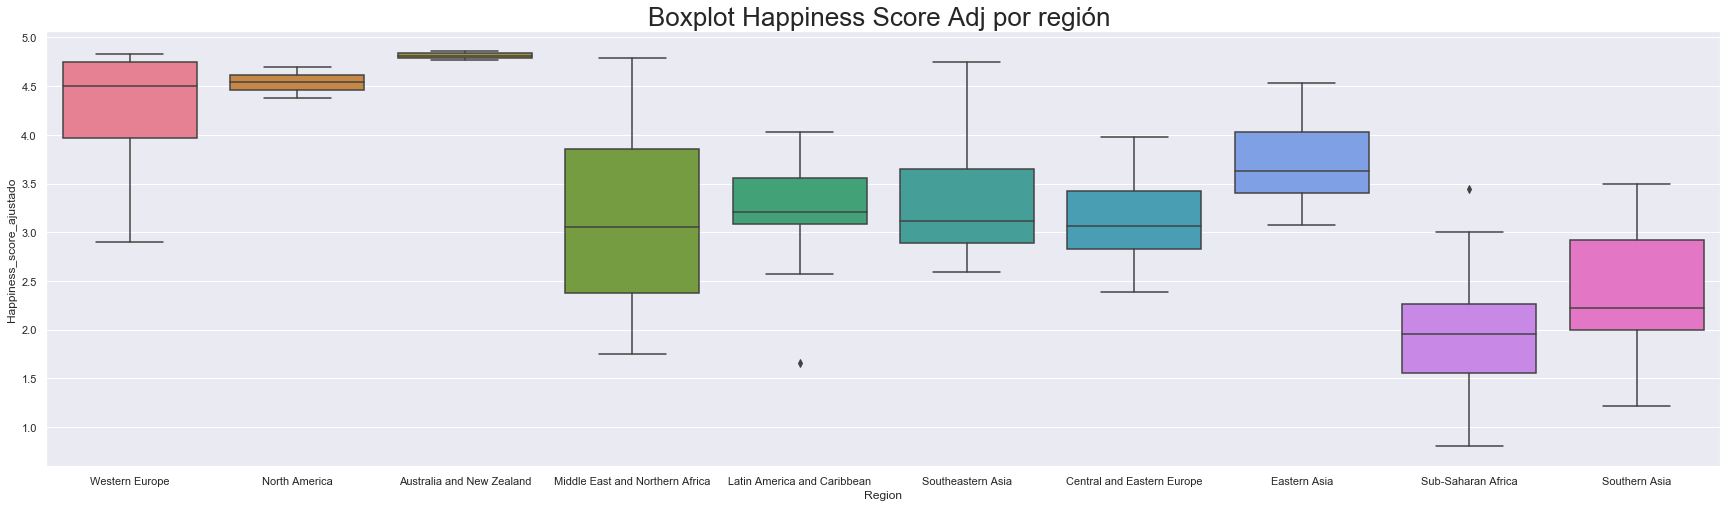

In [165]:
sns.set(rc={'figure.figsize':(30,8)})
sns.boxplot(x=daf["Region"],y=daf["Happiness_score_ajustado"],palette="husl")
plt.title('Boxplot Happiness Score Adj por región ',size=26)

En la grafica se detallan los boxplots por region de acuerdo a su felicidad ajustada, africa subsaharianaes la que en promedio tiene la felicidad mas baja

Text(0.5, 1.0, 'Grafica de Violin Happiness Score Adj por región ')

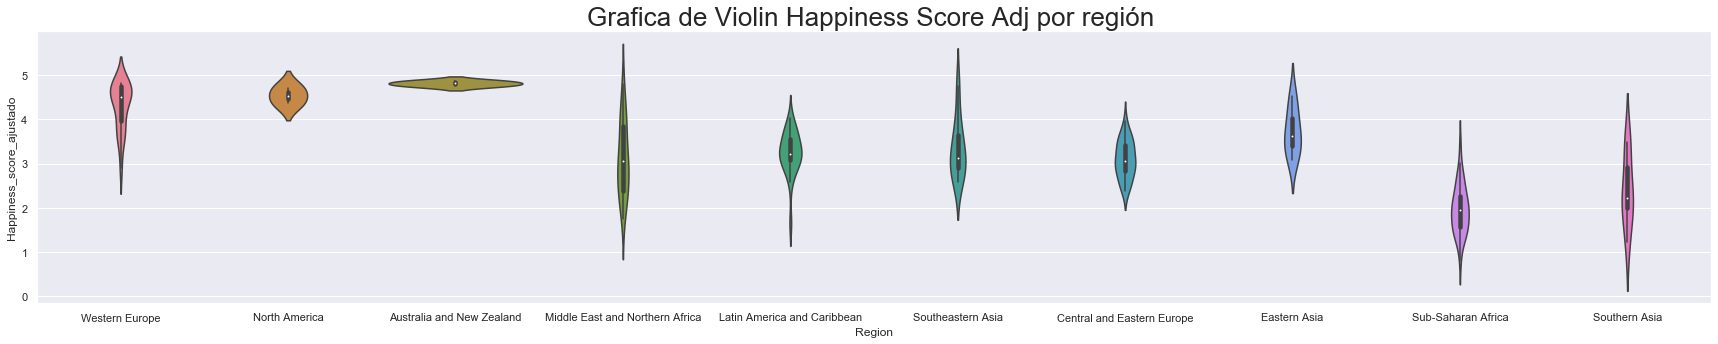

In [166]:
sns.set(rc={'figure.figsize':(30,5)})
sns.violinplot(x=daf["Region"],y=daf["Happiness_score_ajustado"],palette="husl")
plt.title('Grafica de Violin Happiness Score Adj por región ',size=26)

Esta es una forma distinta de visualizar los mismos datos ahora en forma de violin, se llegaria a la misma conclusion que en la grafica anterior



In [171]:
y=daf
y=y.drop(['Happiness_Score','Happiness_score_ajustado'],axis = 1)
y.mean()

Economia         0.300803
Familia          0.261692
Salud            0.178657
Libertad         0.125701
Transparencia    0.046032
Generosidad      0.087106
dtype: float64

Text(0.5, 1.0, 'Distribución de factores que influyen en Happiness Score')

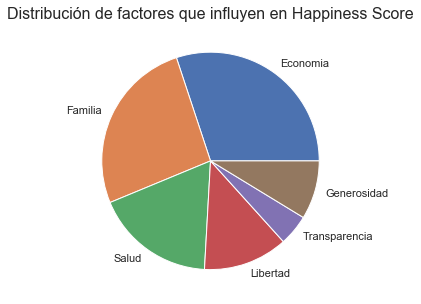

In [172]:
p=y.mean()

var=['Economia','Familia','Salud','Libertad','Transparencia','Generosidad']

plt.pie(p,labels=var)
p
plt.title("Distribución de factores que influyen en Happiness Score",size=16)

En esta grafica podemos ver claramente la distribucion en promedio de los factores que interfieren en la felicidad de los paises , segun el grafico los dos factores que mas influyen en la felicidad son la familia y la economia

In [173]:
daf.head()

,Region,Happiness_Score,Happiness_score_ajustado,Economia,Familia,Salud,Libertad,Transparencia,Generosidad
Country,,,,,,,,,
Denmark,Western Europe,7.526,4.78661,0.301211,0.243124,0.166097,0.121048,0.092869,0.075567
Switzerland,Western Europe,7.509,4.81437,0.317244,0.237880,0.179261,0.121630,0.085583,0.058332
Iceland,Western Europe,7.501,4.66963,0.305519,0.253395,0.185738,0.121260,0.032069,0.102102
Norway,Western Europe,7.498,4.83335,0.326366,0.233151,0.164646,0.123329,0.074019,0.078403
Finland,Western Europe,7.413,4.58704,0.306511,0.247358,0.176783,0.124490,0.089391,0.055574


#### TAREAS OPCIONALES

**Scatter plot**

Un gráfico de dispersión utiliza puntos para representar valores para dos variables numéricas diferentes. La posición de cada punto en el eje horizontal y vertical indica valores para un punto de datos individual, se utilizan para observar las relaciones entre variables.

Los usos principales de las gráficas de dispersión son observar y mostrar las relaciones entre dos variables numéricas. Los puntos de un gráfico de dispersión no solo informan de los valores de los puntos de datos individuales, sino también de los patrones cuando los datos se toman como un todo.

Para ejemplificar graficaremos la relación que existe entre el valor que le asignan a la Familia y su calificación de felicidad ajustada.

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


Text(0.5, 1.0, 'Relación entre la importancia de la Familia y su calificación de Felicidad Adj')

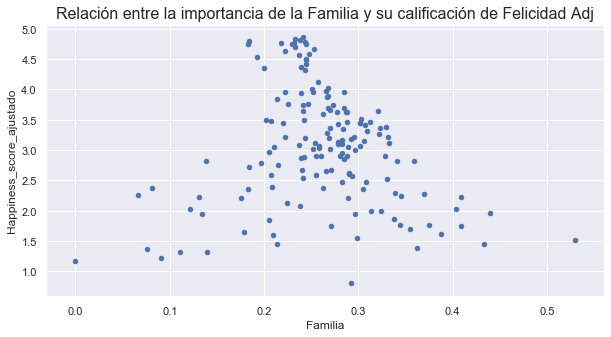

In [174]:
from matplotlib import pyplot as plt
sns.set(rc={'figure.figsize':(10,5)})
daf.plot.scatter(x='Familia', y='Happiness_score_ajustado')
plt.title('Relación entre la importancia de la Familia y su calificación de Felicidad Adj',size=16)


Podemos ver que las observaciones con los valores más altos de felicidad le asignan aproximadamente un 25% de valor a la familia. 

**Hexplot**

Una gráfica de hexplot es útil para representar la relación de 2 variables numéricas cuando se tiene muchos puntos de datos. En lugar de superponerse,la ventana de trazado se divide en varias hexbinas y se cuenta el número de puntos por hexbina, el color indica este número de puntos.

Usaremos el mismo ejemplo de la relación que existe entre el valor que le asignan a la Familia y su calificación de felicidad ajustada.

Text(0.5, 1.0, 'Relación entre la importancia de la Familia y su calificación de Felicidad Adj')

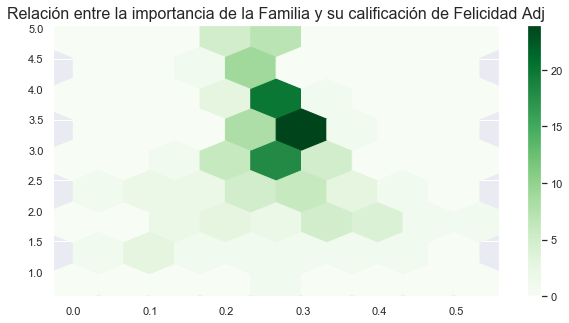

In [175]:
x=daf['Familia']
y=daf['Happiness_score_ajustado']
plt.hexbin(x, y,gridsize=8, cmap=plt.cm.Greens)
plt.colorbar()
plt.title('Relación entre la importancia de la Familia y su calificación de Felicidad Adj',size=16)

Con esta gráfica podemos observar que la mayor cantidad de datos se agrupan en 3 puntos de happiness score con un 30% de importancia a la familia.

Con este ejemplo es claro ver que cuando tenemos una gran cantidad de datos y queremos ver como se distribuyen con respecto a otra variable es mejor utilizar HEXPLOT, ya que esta función no quita datos y nos da una visión más clara de donde se concentran nuestros datos, mientras que con SCATTERPLOT se dificulta más esta tarea, debido a que quita los valores similares para evitar la saturación.

En resumen, debemos usar SCATTERPLOT solo cuando trabajamos con datasets con pocos datos y HEXPLOT cuando trabajamos con muchos datos, para lograr una mejor visulización de su comportamiento.

**Gráfica para variables continuas(datos de intervalo)**


_Gráfica de línea_


Text(0.5, 1.0, 'Peso de la familia en America Latina y el Caribe')

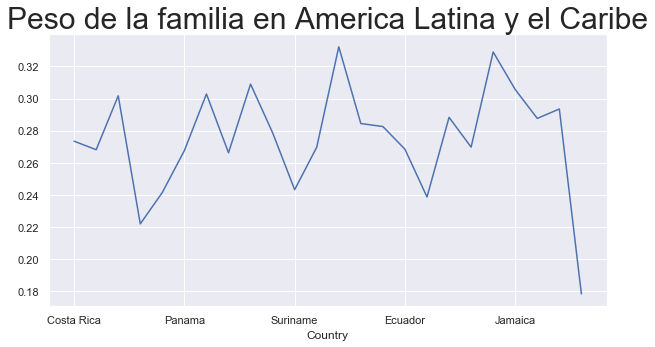

In [206]:
x=daf[(daf['Region'] == "Latin America and Caribbean")]
x['Familia'].plot.line()
sns.set(rc={'figure.figsize':(10,5)})
plt.title('Peso de la familia en America Latina y el Caribe',size=30)

_KDE_

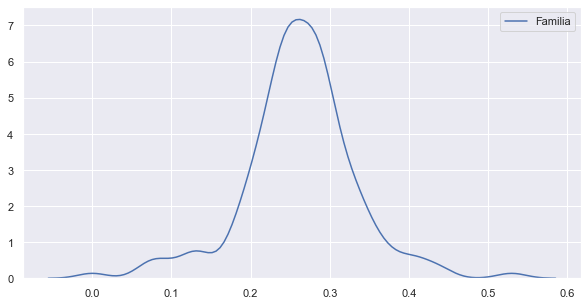

In [185]:
import seaborn as sns
sns.kdeplot(daf.Familia)

**Gráfica para variables nominales**

_Boxplot_

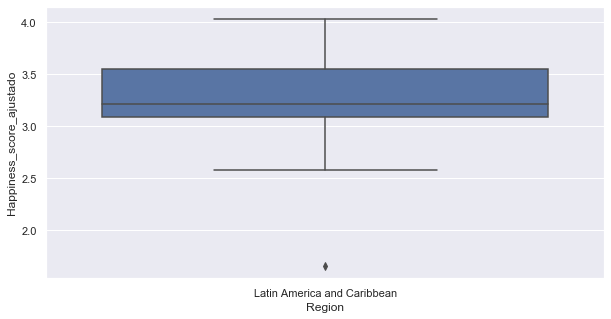

In [204]:
sns.boxplot(x="Region",y="Happiness_score_ajustado",data=x)

**Gráfica para variables ordinales**

_Histograma_

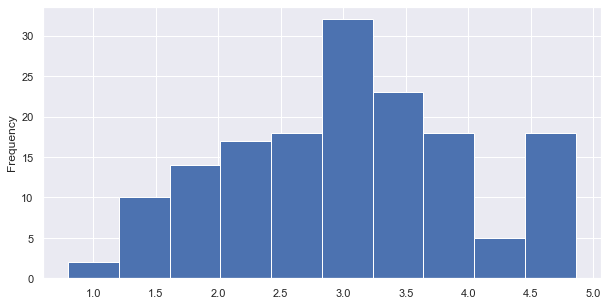

In [179]:
daf['Happiness_score_ajustado'].plot.hist()